## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [12]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA-VISIBLE-DEVICES']="0"

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
#請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = ((x-x.min())/(x.max()-x.min()))
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

建立一個 Model 一定要有 input_layer (Keras.layers.Input) ，這邊其實也可以寫成 x = keras.layers.Input，這樣就不用特別去給定 i == 0 的時候要特別去接 input_layer，出題教練應該是希望讓學員可以更清楚看到 input_layer 的位置而已

In [16]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [17]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [19]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.9873 - acc: 0.2702 - val_loss: 1.8594 - val_acc: 0.3235
Epoch 2/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.7685 - acc: 0.3612 - val_loss: 1.6799 - val_acc: 0.4004
Epoch 3/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.6611 - acc: 0.4025 - val_loss: 1.6005 - val_acc: 0.4266
Epoch 4/100
50000/50000 [==============================] - 9s 174us/step - loss: 1.5803 - acc: 0.4360 - val_loss: 1.5742 - val_acc: 0.4444
Epoch 5/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.5294 - acc: 0.4545 - val_loss: 1.5243 - val_acc: 0.4632
Epoch 6/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.4907 - acc: 0.4684 - val_loss: 1.5225 - val_acc: 0.4580
Epoch 7/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.4497 - acc: 0.4836 - val_loss: 1

50000/50000 [==============================] - 9s 181us/step - loss: 0.5534 - acc: 0.8023 - val_loss: 2.0182 - val_acc: 0.5196
Epoch 60/100
50000/50000 [==============================] - 8s 163us/step - loss: 0.5404 - acc: 0.8084 - val_loss: 2.0397 - val_acc: 0.5100
Epoch 61/100
50000/50000 [==============================] - 9s 181us/step - loss: 0.5408 - acc: 0.8074 - val_loss: 2.0672 - val_acc: 0.5217
Epoch 62/100
50000/50000 [==============================] - 9s 170us/step - loss: 0.5136 - acc: 0.8152 - val_loss: 2.1409 - val_acc: 0.5080
Epoch 63/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.5088 - acc: 0.8179 - val_loss: 2.1415 - val_acc: 0.5115
Epoch 64/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.4915 - acc: 0.8253 - val_loss: 2.1621 - val_acc: 0.5090
Epoch 65/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.5209 - acc: 0.8127 - val_loss: 2.1431 - val_acc: 0.5097
Epoch 66/100
50000/50000 [=======

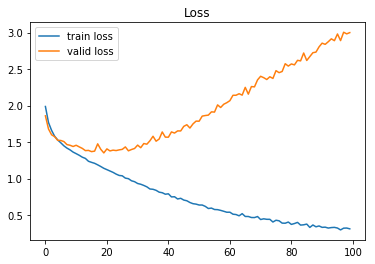

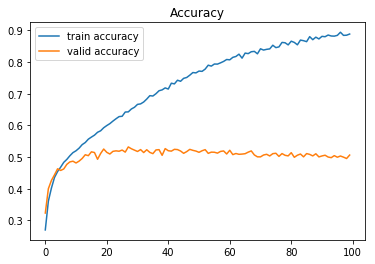

In [22]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

